# <center>Проектирование признаков<center>

In [369]:
import numpy as np
import pandas as pd
import re
import category_encoders as ce
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [370]:
data = pd.read_csv('data/wine_cleared.zip')

## <center>Введение<center>

Как мы выяснили в предыдущих модулях, бывает недостаточно данных, собранных после этапа формирования проблемы. Данные могут быть представлены в «неподобающем» для обучения виде, например в формате даты или времени, большого текста. 

**Пример**

При прогнозировании дефолта клиента банка для создания прогнозной модели очень важно иметь информацию о дате выдачи кредита, плановой и действительной датах погашения. Эти даты дают нам представление о характере погашения кредита: был он выплачен вовремя или раньше срока, с просрочкой. 

В отличие от человека, модель машинного обучения не может проанализировать эти даты. А вот информация о просрочке (разница между плановой и фактической датой погашения) представлена в числовом формате и может сообщить некую информацию модели. Число, равное или меньше 0, говорит о клиенте как о благонадёжном заёмщике; число больше нуля характеризует заёмщика как должника. Такое конструирование признаков помогает дата-сайентисту не утратить часть данных, а также представить их в более «выгодном» свете.

В знакомой нам задаче винных обзоров информация о вкусовых качествах вина также может оказаться важной при его оценке, но не может быть передана в модель машинного обучения, так как этот признак — сплошной текст. Однако мы можем вычленить из текста информацию о положительной или отрицательной оценке вина, превратив её в признаки. Такой признак, скорее всего, оказался бы важным в определении качественных вин. Определить его значимость мы сможем только на этапе отбора признаков, который мы также будем изучать в модулях EDA.

Избавляться от перечисленных выше данных было бы неправильно, ведь мы можем лишиться части потенциально важной информации. Проектирование признаков как раз занимается преобразованием такой информации в признаки для будущей модели машинного обучения. 

На этапе проектирования признаков специалисты по данным преследуют такие же цели, как на этапе сбора данных — сконструировать как можно больше признаков, чтобы далее отобрать из них лучшие.

## <center>Создание признаков<center> 

Проектирование признаков — самый творческий процесс во всём цикле жизни создания модели машинного обучения.  Он включает в себя несколько этапов: 

+ создание признаков;
+ преобразование признаков;
+ отбор признаков. 

В данном модуле мы подробно познакомимся с каждым из этапов проектирования признаков. Этот юнит будет посвящён процессу создания признаков.  
Создание признаков, feature extraction, часто именуемое генерацией признаков, — творческий процесс извлечения новых признаков путём создания признаков из существующего набора данных или путём использования дополнительной информации. Проектирование признаков необходимо для улучшения качества будущей модели: в процессе создания признаков появляются новые, возможно, более качественные, чем исходные. Новые признаки могут быть сконструированы двумя способами: 

- с помощью внешних источников данных;
- из существующего набора данных. 

Новые признаки можно сконструировать из уже существующего набора данных несколькими способами: 

* разбор категорий; 
* разбор даты и времени;
* разбор числовых признаков;
* разбор текста.

### <center>Разбор даты и времени<center>

Признаки, обозначающие дату и время, могут содержать много полезной информации. Например, в нашем датасете в названии вина можно увидеть год производства вина. Этот признак может оказаться важным для определения рейтинга вина. Однако, пока он заключен в названии вина, модель не сможет его использовать. Можно выделить год, месяц и часы в отдельные признаки: время суток, времена года и так далее. И если вы считаете, что ваш процесс зависит от времени, посвятите этому этапу как можно больше усилий.

### <center>Разбор числовых величин<center>

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:

In [371]:
# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65


Для таких преобразований важен контекст. В контексте вина для сомелье цена в 35$ и 35.363389$ одинакова. Вы делаете округление признака, чтобы модель также не сосредотачивалась на сотых. Это может помочь улучшить предсказание.

Однако такое преобразование неуместно в ситуациях, когда сотые важны. Например, при предсказании курса лиры стоимость валюты в 6.12 руб. и в 6.84 руб. — абсолютно разные ситуации. 

Помимо округления для создания новых признаков могут применяться такие популярные операции, как логарифмирование числового признака или извлечение его корня. Это подразумевает создание признаков в наиболее удобной форме для обучения модели. О необходимости таких преобразований вы узнаете далее в юните преобразования данных.

### <center>Разбор текста<center>

Текстовые признаки могут содержать в себе большое количество информации. Например, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки.

В названии вина вы можете заметить указание года произведения вина. Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак.

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

Регулярные выражения (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

![](images/find_mail.jpg)

In [372]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012


Разберём регулярное выражение \d{4}:

* \d — класс символов, обозначает соответствие цифрам в диапазоне цифр [0-9];
* {4} в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.

Таким образом, \d{4} означает поиск четырехзначных чисел в заданной строке.

Проверить, насколько точно работает ваше регулярное выражение, а также найти реализацию популярных регулярных выражений (например, поиска номера телефона), вы сможете на сайте https://ihateregex.io.

Однако при поиске числа методом data['title'].str.findall(regex) результатом выполнения является список найденных цифр. Поэтому необходимо извлечь первый элемент из списка найденных методом str.get(0), где 0 — первый элемент в списке найденных чисел.  
Используя методы работы со строками pandas и регулярные выражения, можно извлечь любую информацию для новых признаков: даты, слова и выражения.

### <center>Разбор категорий<center>

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

In [373]:
# создаем признак производства вина в США
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0) 
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1


В наборе данных также есть ещё две страны, которые являются не менее популярными производителями вина.

#### **Задание 2.1**

Выберите из списка две самых популярных (помимо США) страны, производящих вино.

In [374]:
country_moda = data['country'].value_counts() # получили частоту стран
country_moda                                  # вывели частоту

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

Возможно, производство вина в этих странах также влияет на рейтинг. Давайте создадим для них бинарные признаки.

### **Задание 2.2**

Создайте бинарные признаки is_france, is_italy наподобие признака is_usa. В ответ впишите результат выполнения кода *data['is_france'].sum()* и *data['is_italy'].sum()*

In [375]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0) # создали признак французкого вина
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)   # создали признак итальянского вина
print(data['is_france'].sum())                                                 # вывели к-во французких вин
print(data['is_italy'].sum())                                                  # вывели к0во итальянских вин

22093
19540


Также вы можете создавать некие бизнес-правила, гипотезы. Попробуем вывести правило в определении качества вина: старые вина лучше молодых. В нашем датасете 40 % вин старше 2010 года. 

#### **Задание 2.3**

Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года. В ответ впишите результат выполнения кода *data['old_wine'].sum()*:

In [376]:
# функция возвращает признак старого вина
def get_old_wine(x):    
    if x is np.nan:      # если год производства не определен
        return np.nan    # то возвраащем NaN
    elif int(x) < 2010:  # иначе если вино старше 2010 года
        return 1         # то возвращем 1
    else:                # иначе
        return 0         # возвращаем 0
    

data['old_wine'] = data['year'].apply(get_old_wine)   # создали признак cтарого вина
print(data['old_wine'].sum())                         # вывели к-во стары вин

39781.0


Итак, разбор категориальных признаков может быть использован для выделения самых популярных, уникальных категорий в отдельный признак. Таким образом, разбор категорий, даты и времени, числовых признаков, текста применяются для создания новых, более сильных признаков для обучения.

### **Задание 2.7**

Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.

Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

In [377]:
pattern = r'\((.*?)\)'                                            # регулярное выражение для нахождения чисел
data['locality'] = data['title'].str.findall(pattern).str.get(0)  # вытащили провинцию из текста
data.head()                                                       # вывели заголовок НД

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1,0.0,Etna
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0.0,Douro
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1,0,0,0.0,Willamette Valley
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1,0,0,0.0,Lake Michigan Shore
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0,0.0,Willamette Valley


## <center>Создание признаков. Внешние источники данных<center>

**Внешние источники данных** — дополнительные источники информации, использующиеся для обогащения датасета. Существует два типа внешних источников данных — открытые и закрытые.

Открытые источники доступны всем пользователям интернета. Их предоставляют такие источники, как Федеральная служба государственной статистики, Федеральная налоговая служба, Центральный банк, Википедия и так далее.

Компания, занимающаяся построением предсказательной модели, может запросить данные в качестве услуги (data as a service) у компании-провайдера данных. Это случай обогащения датасета закрытыми данными. Источниками закрытых данных являются сотовые операторы, БКИ, Госуслуги, ФССП (Федеральная служба судебных приставов) и так далее.

**Внешняя информация** бывает общая и профильная.

**Общая внешняя информация** — это различные общие географические, экологические, статистические и другие данные. 

* географические: население страны, площадь страны, столица страны и так далее.
* экологические: среднегодовая температура местности, текущее время года, уровень загрязнения воздуха и так далее.
* статистические: доходы населения, половозрастной состав, уровень безработицы и так далее.

Они находятся в открытых источниках: Росстат, Википедия и так далее. Для доступа к ним применяется парсинг, скачивание и работа с файлами файлов, реже — работа по API.

**Профильная внешняя информация**— информация, связанная со сферой бизнеса, проблему которого необходимо решить. 

Для доступа к такой информации часто применяются запросы по API, парсинг, работа с файлами.

### <center>Работа с файлами<center>

Часто маленькие страны с небольшим количеством населения имеют узкую специализацию. Например, в производстве вина особенно успешны Франция, Италия, Испания, Новая Зеландия. Чтобы проверить, влияет ли на качество вина населённость, выясним информацию о населении страны, в котором была произведена бутылка вина. 

In [378]:
country_population = pd.read_csv('data/country_population.zip', sep=';')  # загрузили набор данных из файла
country_population                                                        # вывели набор данных

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


#### **Задание 3.1**

Каково население Италии согласно датасету country_population? Ответ вводите без пробелов и запятых.

In [379]:
population = country_population[country_population['country'] == 'Italy']   # выбрали НД по Италии
print(population['population'].values)                                      # вывели население

['59,097,904']


Далее сопоставим значения из датасета country_population и страной-производителем вина. На основе значений населения из country_population заполним новый признак country_population.

Используем для этого функцию для объединения датасетов join. Для объединения используем аргумент on='country', указывая столбец, по которому объединяем датафреймы:

In [380]:
data = data.join(country_population.set_index('country'), on='country') # объединили таблицу вин и населения 

Итак, мы получили новый признак для нашего датасета — население страны.

In [381]:
country_area = pd.read_csv('data/country_area.zip', sep=';')  # считали таблицу с площадями стран
country_area                                                  # вывели НД 

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


#### **Задание 3.2**

Создайте новый признак area_country — площадь страны, аналогичный признаку population.

Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? Ответ вводите без пробелов, округлите до целых.

In [382]:
data = data.join(country_area.set_index('country'), on='country')  # объединили таблицу вин и площадей

In [383]:
pattern = 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))' # маска фильтрации
country_area = data[data['title'] == pattern] # выбрали НД по вину
country_area                                      # вывели население

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
94,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,...,Gård,22,2014,1,0,0,0.0,Columbia Valley (WA,"333,022,386",9372610.0


Внешней информации можно получить очень много. Руководствуйтесь следующими **правилами при работе с внешними источниками данных**:

1. Старайтесь найти профильную информацию по вашей бизнес-проблеме. При предсказании рейтинга фильма информация об успехе режиссёра в других картинах будет полезнее, чем среднегодовая температура страны, в которой снят фильм.
2. Если у вас много времени и ресурсов, соберите как можно больше признаков любого качества. Чем больше данных вы сгенерируете, тем выше вероятность получить качественные признаки на этапе отбора данных.
3. Используйте наименее трудозатратный для вас метод поиска информации: работа с файлами, парсинг, запрос по API. Если останется время, можете попробовать другой подход.
4. Не уделяйте всё время разработки поиску дополнительной информации. Вам ещё будет необходимо построить модель, вывести её в продакшн — это также требует времени. 
5. Помните, что цикл разработки модели цикличен: при достижении неудовлетворительных результатов вы всегда сможете вернуться на любой шаг, в том числе и на шаг проектирования признаков.

## <center>Работа с форматом "дата-время"<center>

Чтобы не потерять важную информацию, заключённую в формате даты и времени, необходимо преобразовать эту информацию таким образом, чтобы признак был в формате числа, а не строки. 

Например, дата последнего захода на сайт может быть преобразована в количество дней с момента последнего входа на сайт, то есть результат разницы между текущей датой и датой последнего захода на сайт:

**текущая дата - дата с последнего захода на сайт = количество дней с момента последнего посещения сайта** 

Также мы можем посчитать количество минут, секунд, месяцев, лет с момента какой-либо даты. Это зависит от контекста:

* минуты и секунды актуальны для событий, часто меняющихся во времени;
* месяцы и года — для событий, которые происходят реже. Например, вычисление возраста из даты (лет), подсчёт стажа на последнем месте работы (месяцев, лет).  

Помимо разницы в датах вы можете подмечать, в какое время суток произошло некое событие: день, вечер, ночь. 

Также вы можете выделять из даты месяц или время года некоего события. Так вы сможете выяснить, например, влияет ли время года на покупку бытовой техники на сайте компании.

Создавая новые признаки из строковых признаков, мы также можем получить признаки в строковом представлении как в случае со временем суток. Такой признак мы по-прежнему не можем передать в модель. Но можно передать его в виде: 1 — утро, 2 — день, 3 — вечер, 4 — ночь. Этот приём часто используется дата-сайентистами для оцифровки некоторых категорий и называется кодированием. С кодированием признаков мы познакомимся в следующем юните.

Мы рассмотрели самые популярные идеи для создания признаков из даты, но вы можете придумать гораздо больше вариантов, так как генерация признаков — это очень творческий процесс, ограниченный только фантазией и временем автора.

Давайте теперь приступим к практическим заданиям. В следующих заданиях мы будем использовать срез базы данных из колл-центра. Компания хочет предсказывать, какому из клиентов стоит звонить сегодня, а какому — нет.

Давайте рассмотрим, из каких признаков состоит срез данных:

+ *client_id* — идентификатор клиента в базе;
+ *agent_date* — время соединения с агентом;
+ *created_at* — время соединения с клиентом (начало разговора);
+ *end_date* — время окончания соединения с клиентом (конец разговора).

In [384]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


Все признаки в наборе данных, за исключением номера клиента, представляют собой дату и время. Давайте создадим несколько признаков из этих данных. Мы можем посчитать, сколько примерно длилось время разговора клиента и сотрудника компании — длительность разговора. Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка.

In [385]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds # подсчитали длительность звонка
calls                                                                    # вывели НД

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


Таким образом мы получили новый признак duration — длительность разговора в секундах. Давайте создадим ещё несколько признаков на основе существующих.

#### **Задание 4.1**

Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак *time_connection.* В ответ запишите результат выполнения следующего кода: *calls['time_connection'].sum().*

In [386]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds # подсчитали длительность дозвона
print(calls['time_connection'].sum())       

89


Факт дозвона очень важен для компании, ведь если до клиента не удалось дозвониться, необходимо звонить ещё. 

#### **Задание 4.2**

Создайте новый признак *is_connection* — факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0. В ответ запишите результат выполнения следующего кода: *calls['is_connection'].sum()*.

In [387]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0) # создали признак соединения
print(calls['is_connection'].sum())                                            # вывесли длительность всех соединений

7


#### **Задание 4.3**

Создайте признак *time_diff* — разницу в секундах между началом звонка(не разговора) и его окончанием. В ответ запишите результат выполнения следующего кода: *calls['time_diff'].sum()*.

In [388]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds # подсчитали полную длительность звонка
print(calls['time_diff'].sum())                                       # вывесли длительность всех соединений

1144


Итак, мы получили четыре новых признака для нашего набора данных: duration, time_connection, is_connection, time_diff. После генерации признаков из дат исходные признаки agent_date, created_at, end_date нам больше не нужны — передать на вход модели мы им не сможем, так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их:

In [389]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

Итоговый набор данных включает в себя колонки *client_id, duration, time_connection, is_connection, time_diff*. Таким образом, мы получили набор данных с признаками, которые можно подать на вход модели, и не потеряли важную информацию о событиях, произошедших в даты набора данных.

#### **Задание 4.5**

Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

При попытке преобразовать созданный ранее столбец year в формат datetime, вы получите ошибку OutOfBoundsDatetime, которая возникает из-за некорректного ожидаемого формата входных данных. Чтобы справиться с этой ошибкой, воспользуйтесь параметром errors в функции to_datetime библиотеки Pandas. Параметр нужно установить в значение coerce:

In [390]:
data['year_date'] = pd.to_datetime(data['year'], errors = 'coerce')

In [391]:
beg_date = pd.to_datetime('2022-01-12')
data['years_diff'] = (beg_date - data['year_date'])
print(data['years_diff'].max())

98627 days 00:00:00


## <center>Кодирование признаков. Методы.<center>

Ещё одним важным этапом проектирования признаков является обработка нечисловых (**категориальных**) признаков. Многие модели машинного обучения не умеют работать с категориальными данными. Если мы передадим на вход модели такие признаки, она выдаст ошибку. 

Процесс преобразования категориальных данных в признаки, пригодные для обучения, называется **кодированием признаков**.

Существует множество методов кодирования. Выбор подходящего метода часто превращается в сложную задачу. Для упрощения этой задачи мы будем использовать схему выбора метода кодирования, изображённую на рисунке ниже.

![](images/coding.jpg)

Эта схема предназначена только для категориальных признаков.

Если признак, который вы собираетесь кодировать, порядковый, используйте **порядковое кодирование** (Ordinal Encoding). 

Для **номинальных признаков** важно количество уникальных значений признака, так как при их большом количестве могут возникать проблемы с памятью. Если у признака меньше 15 значений, следует выбирать для данных **однократное кодирование** (OneHot Encoding). Число 15 выбрано эмпирически — для вашего набора данных это число может быть 20 или 10. Это зависит от количества признаков в вашем датасете, количестве строк и многих других факторов. Если признаков немного, то вы также можете воспользоваться однократным кодированием. В других ситуациях вам стоит выбрать другой способ кодирования, например **бинарный** (Binary Encoding).  
Ниже мы рассмотрим методы кодирования, обозначенные в блок-схеме. Для кодирования категориальных признаков мы будем использовать библиотеку *category_encoders*. Это удобная библиотека для кодирования категориальных переменных различными методами.

Рассмотрим следующие популярные способы кодирования: 

* порядковое кодирование (Ordinal Encoding); 
* однократное кодирование (OneHot Encoding); 
* бинарное кодирование (Binary Encoding).

Создадим обучающий набор для кодирования порядковых признаков — ассортимент небольшого магазина с одеждой, где size — буквенное обозначение размера одежды, type — тип изделия.

In [392]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


Вспомним о типах категориальных признаков в задании ниже.

### <center>Порядковое кодирование. Ordinal Encoding<center>

В порядковой кодировке признаков каждому строковому значению присваивается значение в виде целого числа, свойственного для конкретного значения строки.Результат кодирования порядкового признака size будет выглядеть так: каждому строковому значению присваивается значение в виде целого числа.

![](images/ordinal_encoding.jpg)

Выполним теперь кодирование порядкового признака *size* в Python. Порядковое кодирование в библиотеке реализовано в классе *OtdinalEncoder*. По умолчанию все строковые столбцы будут закодированы.

Метод *fit_transform* устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. Затем используем метод *concat()* для добавления закодированного признака в датафрейм data.

In [393]:
# импортируем библиотеку для работы с кодировщиками
import category_encoders as ce 

# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 'm': 4, 'l': 5, 'xxl': 6}}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)
clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


Порядковое кодирование может успешно использоваться для кодирования порядковых признаков. Мы можем закодировать признак size — размер одежды со значениями xxs, xs, s соответственно в значения 1, 2, 3. Это будет логично, и моделью не будут сделаны выводы о неправильном порядке. Увеличение размера будет соответствовать логическому увеличению кода этого значения: xxs меньше xs, и числовой код 1 (xxs) меньше, чем числовой код 2 (xs).

Однако порядковое кодирование плохо работает для номинальных признаков. Ошибку при кодировании мы не получим, но алгоритмы машинного обучения не могут различать категории и числовые признаки, поэтому могут быть сделаны выводы о неправильном порядке. 

Мы получим признак в числовом представлении, и модель машинного обучения будет воспринимать знак зодиака как числовой признак. Ошибочен ли вывод, что чем больше числовой код знака зодиака, тем лучше (или наоборот хуже), как это было бы в порядковом признаке? Да, так как эти категории независимы. Ошибки мы не получим, однако для номинальных признаков существует более эффективные типы кодирования, которые мы рассмотрим позже.

В случае с магазином одежды для размера одежды size уместно применить **порядковое кодирование**. Кодирование размера xxs, xs, s в 1, 2, 3 будет соответствовать логическому увеличению порядка.

А для номинального признака type необходимо подобрать другое кодирование. Мы сделаем это далее в юните при знакомстве с **OneHot-кодированием**.

#### **Задание 5.3**

Используйте ранее изученные методы кодирования и закодируйте признак year в датасете винных обзоров порядковым кодированием.

In [394]:
years_set = set(data['year'].values)                                              # создаем множество уникальных значений года вмна
years_dict = {}                                                                   # создаем пустой словарь
for key in years_set:                                                             # выполняем цикл для каждого элемента множества
    if key is not np.nan:                                                         # если год определен
        years_dict[key] = 2021 - int(key)                                         # то вставляем его значение в словарь замены
# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{'col': 'year', 'mapping': years_dict}]) # выполняем порядковое кодирование
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(data[['year']])                              # создаем столбец с кодированным значением года
# добавляем результат к исходному DataFrame
data = pd.concat([data, data_bin], axis=1)                                        # добвляем столбец с новым занчением года к НД
data.head()                                                                       # заголовок выводим НД


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,is_usa,is_france,is_italy,old_wine,locality,population,area,year_date,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,1,0.0,Etna,"59,097,904",301230.0,2013-01-01,3298 days,8.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0.0,Douro,"10,347,892",92391.0,2011-01-01,4029 days,10.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,1,0,0,0.0,Willamette Valley,"333,022,386",9372610.0,2013-01-01,3298 days,8.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,1,0,0,0.0,Lake Michigan Shore,"333,022,386",9372610.0,2013-01-01,3298 days,8.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,1,0,0,0.0,Willamette Valley,"333,022,386",9372610.0,2012-01-01,3664 days,9.0


### <center>Однократное кодирование. One-hot encoding.<center>

Однократное кодирование (его ещё часто называют **«горячим»**) является автоматизированным кодированием, которое мы делали в юните Создание признаков. Для каждой новой категории создается новый бинарный признак. Значение 1 в этих признаках проставляется там, где значение исходного признака равно этой категории.  

![](images/color_code.jpg)

Этот способ кодирования понятен, хорошо работает как на номинальных, так и на порядковых признаках. Однако существует один минус: количество созданных признаков равно количеству уникальных значений категориального признака.   
Вернёмся к датасету clothing. Закодируем признак type однократным кодированием. Закодируем признак type в Python. Используем класс *OneHotEncoding* библиотеки *category_encoders*. Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

In [395]:
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])            # трансформируем столбец type
clothing = pd.concat([clothing, type_bin], axis=1)            # добаляем полученные столбцы к НД
clothing                                                      # выводим НД

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


Таким образом, мы получили четыре новых признака для категорий coat, dress, shirt, skirt. В строке нужного типа исходного признака стоит значение 1, в остальных строках — 0. Эти признаки пригодны для обучения.

На самом деле метод однократного кодирования реализован в pandas в функции pd.get_dummies(). Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа object:

clothing_dummies = pd.get_dummies(clothing, columns=['type'])  

Новые бинарные признаки также часто называются dummy-признаками или dummy-переменными.

#### **Задание 5.4**

В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.  В ответе напишите, сколько признаков добавилось после применения кодирования.

In [396]:
encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['taster_name'])                # трансформируем столбец taster_name
data = pd.concat([data, type_bin], axis=1)                           # добаляем полученные столбцы к НД
data.info()                                                          # выводим НД

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unnamed: 0                      129972 non-null  int64          
 1   country                         129909 non-null  object         
 2   description                     129972 non-null  object         
 3   designation                     129972 non-null  object         
 4   points                          129972 non-null  int64          
 5   price                           129972 non-null  float64        
 6   province                        129909 non-null  object         
 7   region_1                        129972 non-null  object         
 8   taster_name                     129972 non-null  object         
 9   taster_twitter_handle           129972 non-null  object         
 10  title                           129972 non-n

### <center>Двоичное кодирование<center>

На рисунке ниже представлен алгоритм бинарного кодирования температуры воздуха.

![](images/binary_code.jpg)

1. Сначала признак кодируется в числовое представление, как мы делали это при кодировании порядковых признаков: hot — 1, cold — 2, … и так далее.

2. Затем каждое числовое представление, выраженное целым числом, переводится в двоичный код: 1 – 001, 2 – 010, 3 – 011,... и так далее.

3. Затем для каждого двоичного представления создаются новые признаки. В нашем случае двоичное представления уместилось в три числа, поэтому итогом стало создание трёх новых признаков.

**Пошаговый алгоритм двоичного кодирования можно описать так: **

* значения признака кодируются в некоторый числовой порядок;
* целые числа кодируются в двоичный код;
* цифры двоичного представления формируют новые столбцы.

Вернёмся к примеру с магазином одежды. Закодируем бинарным способом признак type в Python. Используем класс *BinaryEncoder* библиотеки *category_encoders*.

In [397]:
bin_encoder = ce.BinaryEncoder(cols=['type'])           # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])  # кодируем столбец type
clothing = pd.concat([clothing, type_bin], axis=1)      # добавляем полученные столбцы в НД
clothing                                                # выводим НД

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


#### **Задание 5.5**

Закодируйте признак country двоичным способом. Сколько новых признаков образовалось после кодирования признака country?

In [398]:
bin_encoder = ce.BinaryEncoder(cols=['country'])        # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])   # кодируем столбец type
data = pd.concat([data, type_bin], axis=1)              # добавляем полученные столбцы в НД
data.info()                                             # выводим НД

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unnamed: 0                      129972 non-null  int64          
 1   country                         129909 non-null  object         
 2   description                     129972 non-null  object         
 3   designation                     129972 non-null  object         
 4   points                          129972 non-null  int64          
 5   price                           129972 non-null  float64        
 6   province                        129909 non-null  object         
 7   region_1                        129972 non-null  object         
 8   taster_name                     129972 non-null  object         
 9   taster_twitter_handle           129972 non-null  object         
 10  title                           129972 non-n

Метод однократного кодирования можно использовать почти во всех сценариях подготовки данных к обучению за исключением некоторых алгоритмов и проблем с памятью. О том, почему из-за этого может возникнуть проблема, вы узнаете подробнее в модулях про машинное обучение. 

В случаях проблем с памятью необходимо обратиться к другим кодировщикам — к порядковому, бинарному кодировщику или иным.

Методы, рассмотренные в модуле, популярны и очень часто используются в кодировании данных за счёт своей простоты, понятности и лёгкости в реализации. Про другие, менее популярные способы кодирования вы можете прочитать в документации к используемой нами библиотеке category_encoders.

Выбор подходящего метода кодирования может быть непростой задачей при проектировании признаков. Поэтому всегда необходимо тестировать несколько способов кодирования и выбирать тот, с помощью которого получается качественная предсказательная модель

#### **Задание 5.8**

На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров и закодируйте его.
В ответе напишите, сколько признаков добавилось после применения кодирования.

In [399]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])        # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])   # кодируем столбец type
data = pd.concat([data, type_bin], axis=1)                            # добавляем полученные столбцы в НД
data.info()                                                           # выводим НД

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 56 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unnamed: 0                      129972 non-null  int64          
 1   country                         129909 non-null  object         
 2   description                     129972 non-null  object         
 3   designation                     129972 non-null  object         
 4   points                          129972 non-null  int64          
 5   price                           129972 non-null  float64        
 6   province                        129909 non-null  object         
 7   region_1                        129972 non-null  object         
 8   taster_name                     129972 non-null  object         
 9   taster_twitter_handle           129972 non-null  object         
 10  title                           129972 non-n

#### **Задание 5.9**

Определите типы признаков и закодируйте их в соответствии с изученными способами.

In [400]:
# готовим данные для формирования НД
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}]
# сформировали НД
df = pd.DataFrame(list_of_dicts)
# кодируем признак product
prod_dict = {'Product1' : 0, 'Product2' : 1, 'Product3' : 2}
ord_encoder = ce.OrdinalEncoder(mapping=[{'col': 'product', 'mapping': prod_dict}]) 
# применяем трансформацию к столбцу
df_bin = ord_encoder.fit_transform(df[['product']])                                
# добавляем результат к исходному DataFrame
df = pd.concat([df, df_bin], axis=1)                                               
# кодируем признак payment_type
prod_dict = {'Mastercard' : 0, 'Visa' : 1, 'Amex' : 2}
ord_encoder = ce.OrdinalEncoder(mapping=[{'col': 'payment_type', 'mapping': prod_dict}]) 
# применяем трансформацию к столбцу
df_bin = ord_encoder.fit_transform(df[['payment_type']])                                
# добавляем результат к исходному DataFrame
df = pd.concat([df, df_bin], axis=1)                                               
df

,product,price,payment_type,product,payment_type
0,Product1,1200,Mastercard,0,0
1,Product2,3600,Visa,1,1
2,Product3,7500,Amex,2,2


## <center>Преобразование признаков<center>

Проектирование признаков подразумевает под собой изменение данных, их удаление, создание и тд. В этом юните мы изучим основы преобразования признаков и реализацию этих методов в Python.

В машинном обучении данные часто подвергают различным преобразованиям. Самые популярные из них — это **нормализация** и **стандартизация**, которые мы рассмотрим в этом юните.

**Примечание.** Операции нормализации и стандартизации также часто называют **шкалированием**. 

**Проблема**

Часто данные для обучения представлены в различных единицах измерения, в разном масштабе. Например, в наборе данных может быть представлен признак кадастровая стоимость недвижимости, которая измеряется в миллионах рублей, и признак понижающий коэффициент, который используется для определения налога на недвижимость и измеряется в сотых долях. Или, например, в одном наборе данных встречается признак доход клиента и стаж работы на последнем месте. Стаж в редких случаях поднимается выше 10, тогда как доход измеряется тысячами.

Результат эффективности работы будет формироваться в большей степени за счёт переменной, обозначающей доход из-за больших значений, которые может принимать переменная. Вклад второй переменной в итоговую оценку незначителен из-за её небольших значений Это связано только с тем, что входные данные имеют разный масштаб, а не из-за того, что вторая переменная не значима для результата. 

Таким образом, признаки, которые измеряются в разных масштабах, в разной степени влияют на предсказание модели. Для решения этой проблемы перед обучением обычно делают преобразование признаков.

Рассмотрим такие преобразования, как **нормализация** и **стандартизация**.

### <center>Нормализация<center>

**Нормализация** — один из методов преобразования входных признаков, при котором значения признаков приводятся к заданному диапазону, например [0,...,1]. 

Существует несколько способов нормализации: *MinMaxScaler*, *RobustScaler*.

Попробуем на обучающем примере применить различные способы нормализации к распределениям и увидеть разницу между ними.

Используем библиотеку numpy для создания массивов случайных чисел различных распределений. Выполните этот код, чтобы создать обучающий набор различных распределений:

In [401]:
np.random.seed(34)
# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

Сгенерированные распределения выбраны случайным образом, однако вы можете встретить их, например, в таких наборах данных:

* **Бета-распределение** моделирует вероятность. Например, коэффициент конверсии клиентов, купивших что-то на сайте.
* **Экспоненциальное распределение**, предсказывающее периоды времени между событиями. Например, время ожидания автобуса.
* **Нормальное распределение**, например распределение роста и веса человека.

Рассмотрим распределения на графике. Метод визуализации *kdeplot()* — это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности. Подробнее об этой функции вы можете прочитать в руководстве.

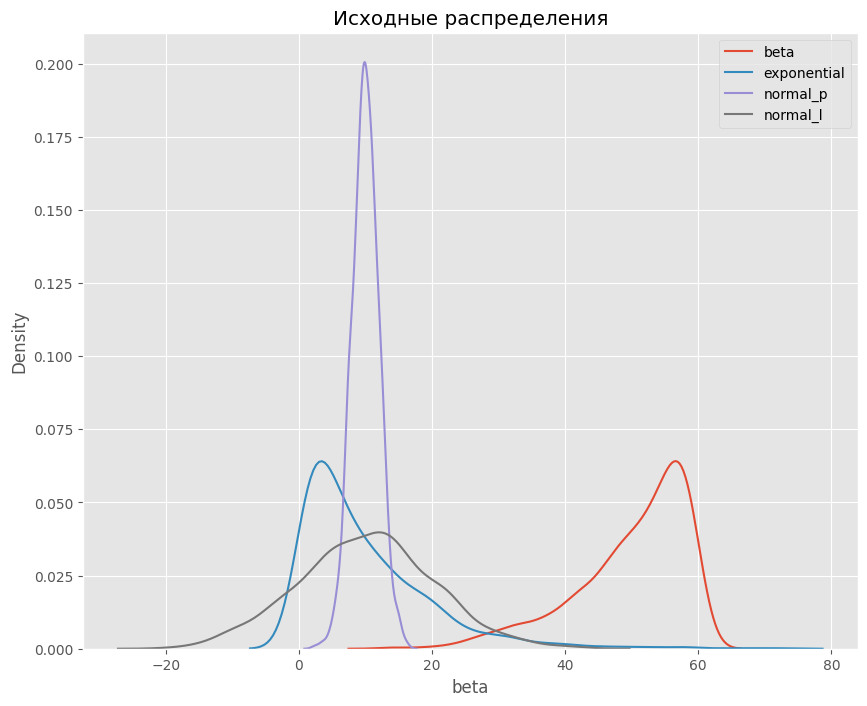

In [402]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

Признаки распределены по-разному: смещены влево, вправо, присутствуют отрицательные величины. Попробуем нормализовать их. Зафиксируем описательные статистики до преобразований.

In [403]:
df.describe()  # получаем описательную статистику

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


Для нормализации данных мы будем использовать уже знакомую нам библиотеку *sklearn*.

#### <center>MinMaxScaler<center>

При применении нормализации методом MinMaxScaler все значения признаков будут преобразованы в диапазон [0,1], что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно.

Нормализация происходит следующим способом:  

1. Из каждого значения признака х вычитается минимальное значение этого признака: $x-min$   
2. Результат вычитания делится на разность между максимумом и минимумом признака: $max-min$

![](images/minmaxscaler.jpg)

Проведём нормализацию распределений признаков из обучающего примера. Класс *MinMaxScaler* делает вышеописанную нормализацию автоматически при помощи функции преобразования *fit_transform*.

<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

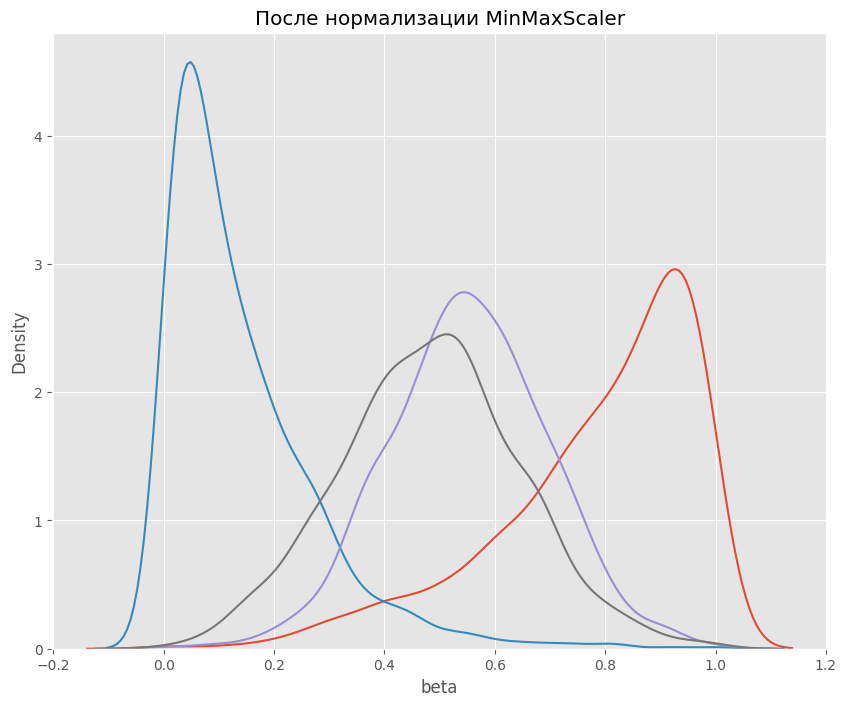

In [404]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

In [405]:
df_mm.describe()  # получаем описательную статистику

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


Как мы видим, значения расположились в диапазоне от минимального 0 до максимального 1, как и должно произойти при таком способе нормализации. Также сохранилась форма исходного распределения: скошенные влево/вправо распределения сохранили свою форму.

#### <center>RobustScaler<center>

Нормализация методом RobustScaler происходит в несколько этапов:

1. из каждого значения признака вычитается медиана признака: $x$ - медиана
2. полученное значение делится на межквартильный размахЖ $значение75% - значение 25%$

![](images/robustscaler.jpg)

Проведём нормализацию распределений признаков из обучающего примера, используя класс *RobustScaler*.

<AxesSubplot:title={'center':'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

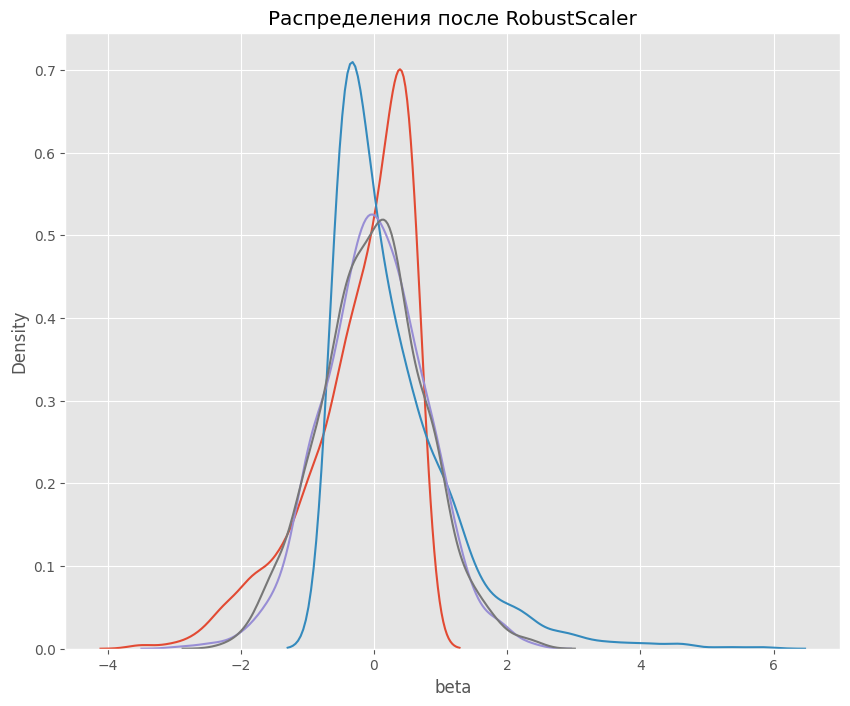

In [406]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

In [407]:
df_r.describe() # получаем описательную статистику

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


Из описательных статистик видно, что *RobustScaler* не масштабирует данные в заданный интервал, как делает это *MinMaxScaler*. Однако распределения не сохранили своё исходное состояние. Левый хвост экспоненциального распределения стал практически незаметным. То же произошло и с бета-распределением. Они стали более нормальными.

##### <center>В чем разница?<center>

Поскольку *MinMaxScaler* использует в своём вычислении минимальное и максимальное значения признака, то этот способ будет чувствителен к наличию выбросов в распределении.

*RobustScaler* в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

Поэтому, если ваши данные уже были очищены от выбросов, смело используйте *MinMaxScaler*. Этот алгоритм нормализации используется специалистами по данным чаще всего в силу его простоты и понятности, а данные на этом этапе чаще всего уже очищены. Если вы пропустили этап очистки данных и нормализуете признаки раньше, используйте нормализатор *RobustScaler*.

### <center>Стандартизация<center>

**Стандартизация** — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение — 1. 

![](images/standart.jpg)

где $x_{std}$ — стандартное отклонение.

Этот процесс можно описать как **центрирование данных с масштабированием**. Сначала происходит вычитание среднего значения из всех данных — центрирование,  а затем деление на отклонение. 

Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.

Чтобы понять, как стандартизация меняет распределение, рассмотрим метод стандартизации *StandardScaler* в Python.

#### <center>StandartScaler<center>

Для стандартизации используем класс *StandardScaler*.

<AxesSubplot:title={'center':'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

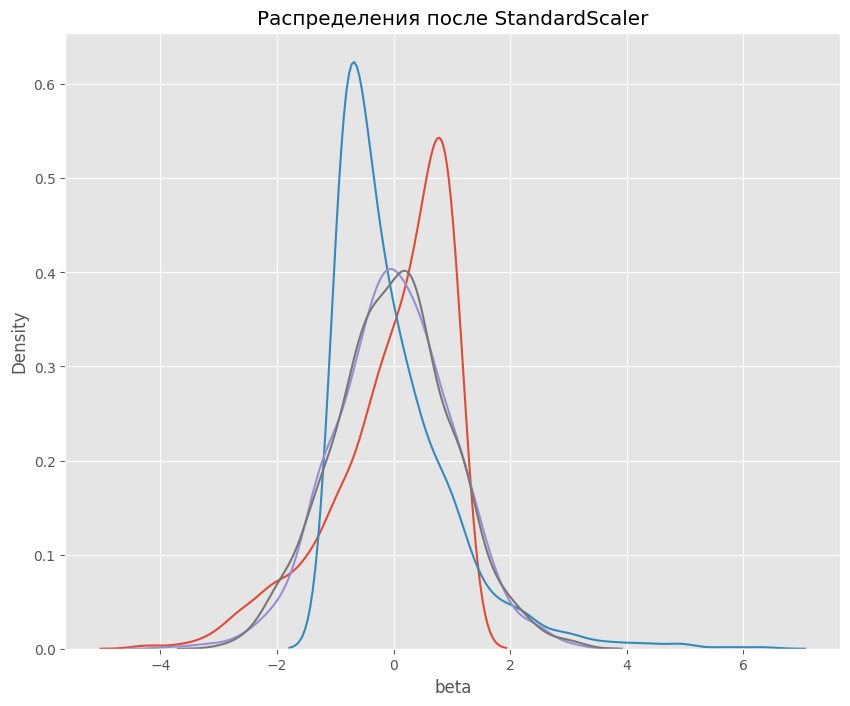

In [408]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [409]:
df_s.describe() # получаем описательную статистику

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


Стандартное отклонение стало равным 1, а средние значения — 0. Распределения изменились подобно RobustScaler — стали более **нормальными**.

#### <center>Нормализовать или стандатизировать?<center>

Так как нормализация и стандартизация преследуют одни и те же цели, возникают вопросы:

Когда признаки необходимо нормализовать, а когда стандартизировать? Какой способ нормализации выбрать? 

Преобразование входных переменных и выбор способа преобразования зависит от конкретной задачи и данных — заранее невозможно узнать, какое преобразования будет лучше. 

Однако мы составили небольшую инструкцию по преобразованию признаков:

* если признак распределён нормально, то его необходимо стандартизировать;
* если признак распределён ненормально, его необходимо нормализовать;
* если разброс значений небольшой, то можно обойтись без преобразования данных.

Выбор определённого способа преобразования и его необходимости может быть нелёгкой задачей, поэтому пробуйте делать различные преобразования и оценивайте результаты на конкретной модели, смотрите, есть ли разница в улучшении качества модели. О том, как сравнивать модели, вы узнаете далее в курсе в модулях про машинное обучение.

?Что лучше? Нормализовать, а потом стандартизировать или наоборот?

Комбинации преобразований также могут быть эффективны. Поэтому проводите эксперименты над моделью и выбирайте то сочетание преобразований, которые обеспечивают лучший результат на ваших данных.

#### **Задание 6.4**

Нормализуйте признак price. Выберите подходящий тип нормализации, учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью. В ответе напишите результат выполнения кода *data['price'].sum()*, округлённый до целого.

In [410]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
data_r = r_scaler.fit_transform(data[['price']], y=None)
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
data_r = pd.DataFrame(data_r, columns=['price'])
print(round(data_r['price'].sum()))

43501


#### **Задание 6.5**

Стандартизируйте исходный признак price. В ответе напишите результат выполнения кода *data['price'][129968]*. Ответ округлите до сотых.

In [411]:
# инициализируем нормализатор RobustScaler
s_scaler = preprocessing.StandardScaler()
data_s = s_scaler.fit_transform(data[['price']], y=None)
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
data_s = pd.DataFrame(data_s, columns=['price'])
print(round(data_s['price'][129968], 2))
data_s.tail()
data_s.head()

1.0


,price
0,0.000003
1,-0.514525
2,-0.539793
3,-0.565060
4,0.748842


## <center>Отбор признаков.Мультиколлинеарность<center>

**Отбор признаков** — процесс выбора важных признаков, наиболее влияющих на предсказание.

Отбор признаков помогает:

1. Сократить время обучения. Чем меньше данных, тем быстрее обучается модель. Например, в скоринговых моделях часто количество признаков на этапе проектирования составляет больше 500, и дата-сайентисты делают отбор признаков, чтобы исключить те признаки, которые вносят наименьший вклад. В редких случаях количество признаков в модели может быть больше 100.

2. Повысить качество предсказания. Избыточные данные могут снижать точность предсказания, могут выступать в качестве «шума». Это явление называют мультиколлинеарностью, которую мы изучим ниже. Мы уже говорили о «проклятии размерности» в юните Работа с пропусками: методы обработки.

Существует множество методов для отбора признаков. Рассмотрим такое понятие, как **мультиколлинеарность** и её связь с отбором признаков.  
**Мультиколлинеарность** — сильная корреляционная связь между признаками, отбираемыми для обучения. Сильно скоррелированные признаки сообщают для модели одну и ту же информацию. Поэтому для обучения не нужно использовать их все. Часть из них необходимо удалить из набора данных.  
Процесс корреляционного анализа и удаление сильно скоррелированных признаков относят к одному из методов отбора признаков.  

Рассмотрим отбор признаков в Python. Для этого воспользуемся обучающим датасетом о цветках ириса.

Данные содержат 150 экземпляров ириса, по 50 экземпляров трех видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

* sepal length — длина наружной доли околоцветника;
* sepal width — ширина наружной доли околоцветника;
* petal length — длина внутренней доли околоцветника;
* petal width — ширина внутренней доли околоцветника.  

✍️ На основании этого набора данных требуется построить модель, определяющую вид растения по данным измерений. 

In [412]:
iris = pd.read_csv('data/iris.zip')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Будем исследовать признаки, которые могут влиять на *variety* — *sepal.length, sepal.width, petal.length, petal.width*.  
Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.

<AxesSubplot:>

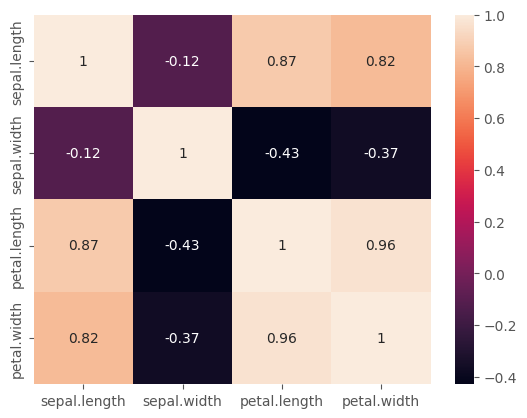

In [413]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(), annot=True)

Чтобы построить модель на этом наборе данных, сделаем отбор признаков — удалим признаки с очень сильной корреляцией (где коэффициент корреляции +/-0.7 и выше).  
Как мы выяснили из тепловой карты корреляций, у нас есть три пары сильно скоррелированных признаков: *sepal.length* и *petal.width*, *petal.length* и *sepal.length*, *petal.width* и *petal.length*.

Начнём с самого высокого коэффициента корреляции в паре признаков: *petal.width* и *petal.length* 0,96. Удалим любой признак из этой пары, например *petal.width*, так как он коррелирует ещё и с признаком *sepal.length*

In [414]:
iris = iris.drop(['petal.width'], axis=1)   # удалили petal.width
iris = iris.drop(['petal.length'], axis=1)  # удалили etal.length
iris.head()                                 # вывели заголовок НД

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


У нас осталось всего два признака с коэффициентом корреляции -0.12: *sepal.width* и *sepal.length*, и признак, который необходимо предсказать — variety. Связь между оставшимися признаками очень слабая, поэтому эти признаки будут включены в итоговый набор данных для обучения.

Это означает, что всего два признака — *sepal length* (длина наружной доли околоцветника) и *sepal width* (ширина наружной доли околоцветника) сообщают модели то же самое, что и исходный набор признаков. Мы уменьшили количество признаков, не потеряв при этом информацию о данных. А признаки *petal length* (длина внутренней доли околоцветника) и *petal width* (ширина внутренней доли околоцветник) сообщают лишнюю информацию для модели. Значит, они не нужны для построения модели.

Таким образом, анализ мультиколлинеарности и исключение сильно скоррелированных признаков помогает отобрать признаки для модели, уменьшить количество признаков, исключить повторяющуюся информацию.

#### **Задание 7.4**

Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.

❗️ Удалять признак рейтинг — points нельзя!

❗️ Для простоты вычислений можете использовать только корреляцию Пирсона.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unnamed: 0                      129972 non-null  int64          
 1   country                         129909 non-null  object         
 2   description                     129972 non-null  object         
 3   designation                     129972 non-null  object         
 4   points                          129972 non-null  int64          
 5   province                        129909 non-null  object         
 6   region_1                        129972 non-null  object         
 7   taster_name                     129972 non-null  object         
 8   taster_twitter_handle           129972 non-null  object         
 9   title                           129972 non-null  object         
 10  variety                         129971 non-n

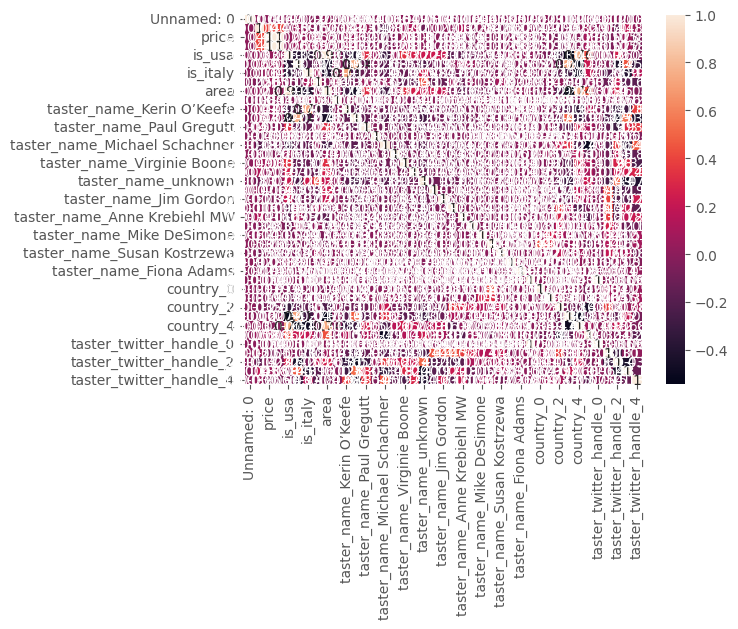

In [415]:
sns.heatmap(data.corr(), annot = True) # визуализируем матрицу
data = data.drop(['taster_twitter_handle_0'], axis=1)
data = data.drop(['country_4'], axis=1)
data = data.drop(['price'], axis=1)
data = data.drop(['is_usa'], axis=1)
data = data.drop(['is_france'], axis=1)
data = data.drop(['is_italy'], axis=1)
data.info()

## <center>Практика<center>

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

* *age* — возраст  
* *sex* — пол (1 - мужчина, 0 - женщина)  
* *cp* — тип боли в груди (4 значения)  
* *trestbps* — артериальное давление в покое  
* *chol* — холестерин сыворотки в мг/дл  
* *fbs* — уровень сахара в крови натощак > 120 мг/дл  
* *restecg* — результаты электрокардиографии в покое (значения 0,1,2)  
* *thalach* — достигнута максимальная частота сердечных сокращений  
* *exang* — стенокардия, вызванная физической нагрузкой  
* *oldpeak* — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя  
* *slope* — наклон пикового сегмента ST при нагрузке  
* *ca* — количество крупных сосудов (0-3), окрашенных при флюроскопии  
* *thal* — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [423]:
heart = pd.read_csv('data/heart.zip')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### **Задание 8.1**

Создайте новый признак old, где 1 — при возрасте пациента более 60 лет. В ответ введите результат выполнения кода *heart['old'].sum()*.

In [429]:
heart['old'] = heart['age'].apply(lambda x: 1 if x >60 else 0) # получили новый признак 
heart.head()                                                   # вывели заголовок

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [430]:
print(heart['old'].sum()) # получили к-во старых пациентов

79


#### **Задание 8.2**

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя. Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

Возраст (лет)	Мужчины	Женщины  
до 20	&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;123/76	&ensp;&ensp;&ensp;116/72  
21-30	&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;126/79	&ensp;&ensp;&ensp;120/75  
31-40	&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;129/81	&ensp;&ensp;&ensp;127/80  
41-50	&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;135/83	&ensp;&ensp;&ensp;137/84  
51-60	&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;142/85	&ensp;&ensp;&ensp;144/85  
61 и старше	&ensp;&ensp;142/80	&ensp;&ensp;&ensp;159/85   

В ответ напишите значение признака trestbps_mean для пациента под номером 300.

In [434]:
# функция возвращает значение признака trestbps_mean в зависимости от возраста и пола
def get_trestbps_mean(row):
    if row['sex'] == 1:
        if row['age'] <=20:
            return 123
        elif 20 < row['age'] <= 30:
            return 126
        elif 30 < row['age'] <=40:
            return 129
        elif 40 < row['age'] <= 50:
            return 135
        else:
            return 142
    else:
        if row['age'] <=20:
            return 1116
        elif 20 < row['age'] <= 30:
            return 120
        elif 30 < row['age'] <=40:
            return 127
        elif 40 < row['age'] <= 50:
            return 137
        elif 50 < row['age'] <= 60:
            return 144
        else:
            return 159
# создаем и выводим заначение нового признака для пациента за номером 300        
heart['trestbps_mean'] = heart[['age', 'sex']].apply(get_trestbps_mean, axis=1)
print(heart['trestbps_mean'][300])

142


#### **Задание 8.5**

Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

Сколько признаков получилось в датасете?

In [454]:
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])             # трансформируем столбец taster_name
heart = pd.concat([heart, type_bin], axis=1)                                                 # добаляем полученные столбцы к НД
heart = heart.drop(['cp'], axis=1)
heart = heart.drop(['restecg'], axis=1)
heart = heart.drop(['slope'], axis=1)
heart = heart.drop(['ca'], axis=1)
heart = heart.drop(['thal'], axis=1)
heart.info()                                                                                 # выводим НД

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  303 non-null    int64  
 11  cp_3.0         303 non-null    int64  
 12  cp_2.0         303 non-null    int64  
 13  cp_1.0         303 non-null    int64  
 14  cp_0.0         303 non-null    int64  
 15  restecg_0.0    303 non-null    int64  
 16  restecg_1.0    303 non-null    int64  
 17  restecg_2.0    303 non-null    int64  
 18  slope_0.0 

#### **Задание 8.6**

Нормализуйте все числовые признаки подходящим способом. В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [455]:
col_names = list(heart.columns)
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
# кодируем исходный датасет
heart_r = r_scaler.fit_transform(heart)
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_r = pd.DataFrame(heart_r, columns=col_names)
heart_r.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,0.081188,0.098646,0.148515,-0.103173,0.326733,0.149752,-0.455446,0.260726,...,0.462046,-0.422442,0.125413,0.214521,0.066007,0.016502,0.059406,-0.452145,0.386139,0.006601
std,0.672748,0.466011,0.876907,0.816232,0.356198,0.704774,0.469794,0.725672,0.498835,0.439757,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,-1.925926,-1.000000,-1.800000,-1.795276,0.000000,-2.523077,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.456693,0.000000,-0.600000,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.543307,0.000000,0.400000,1.000000,0.500000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.629630,0.000000,3.500000,5.102362,1.000000,1.507692,1.000000,3.375000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


#### **Задание 8.7**

Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

In [458]:
df = heart.corr()
df.to_excel('heart.xlsx')